In [1]:
#import pandas_datareader as pdr
#from datetime import datetime
#apple = pdr.get_data_yahoo(symbols='AAPL', start=datetime(2016, 03, 31), end=datetime(2017, 03, 31))
#amazon = pdr.get_data_yahoo(symbols='AMZN', start=datetime(2016, 03, 31), end=datetime(2017, 03, 31))
#google = pdr.get_data_yahoo(symbols='GOOGL', start=datetime(2016, 03, 31), end=datetime(2017, 03, 31))
#ibm = pdr.get_data_yahoo(symbols='IBM', start=datetime(2016, 03, 31), end=datetime(2017, 03, 31))
#msft = pdr.get_data_yahoo(symbols='MSFT', start=datetime(2016, 03, 31), end=datetime(2017, 03, 31))

In [2]:
#apple.to_csv('aapl.csv')

In [3]:
#amazon.to_csv('amzn.csv')

In [4]:
#google.to_csv('googl.csv')

In [5]:
#ibm.to_csv('ibm.csv')

In [6]:
#msft.to_csv('msft.csv')

In [7]:
#we want the Dates to be the index so that we can join all dataframes later. 
#We are interested only in Date and Adj Close columns
import pandas as pd
aapl = pd.read_csv('aapl.csv', index_col = 'Date', parse_dates = True, usecols = ['Date', 'Adj Close'], na_values = ['Nan'])
amzn = pd.read_csv('amzn.csv', index_col = 'Date', parse_dates = True, usecols = ['Date', 'Adj Close'], na_values = ['Nan'])
googl = pd.read_csv('googl.csv', index_col = 'Date', parse_dates = True, usecols = ['Date', 'Adj Close'], na_values = ['Nan'])
ibm = pd.read_csv('ibm.csv', index_col = 'Date', parse_dates = True, usecols = ['Date', 'Adj Close'], na_values = ['Nan'])
msft = pd.read_csv('msft.csv', index_col = 'Date', parse_dates = True, usecols = ['Date', 'Adj Close'], na_values = ['Nan'])

In [8]:
print aapl.head()
print amzn.head()
print googl.head()
print ibm.head()
print msft.head()

             Adj Close
Date                  
2016-03-31  106.733621
2016-04-01  107.712919
2016-04-04  108.819530
2016-04-05  107.536645
2016-04-06  108.662839
             Adj Close
Date                  
2016-03-31  593.640015
2016-04-01  598.500000
2016-04-04  593.190002
2016-04-05  586.140015
2016-04-06  602.080017
             Adj Close
Date                  
2016-03-31  762.900024
2016-04-01  769.669983
2016-04-04  765.119995
2016-04-05  758.570007
2016-04-06  768.070007
             Adj Close
Date                  
2016-03-31  146.224737
2016-04-01  147.257827
2016-04-04  146.823356
2016-04-05  144.824767
2016-04-06  144.844081
            Adj Close
Date                 
2016-03-31  53.814656
2016-04-01  54.145943
2016-04-04  54.009531
2016-04-05  53.161827
2016-04-06  53.707474


In [9]:
aapl = aapl.rename(columns = {'Adj Close' : 'AAPL'})
amzn = amzn.rename(columns = {'Adj Close' : 'AMZN'})
googl = googl.rename(columns = {'Adj Close' : 'GOOGL'})
ibm = ibm.rename(columns = {'Adj Close' : 'IBM'})
msft = msft.rename(columns = {'Adj Close' : 'MSFT'})

In [10]:
frames = [aapl,amzn,googl,ibm,msft]
df1 = pd.concat(frames, axis = 1, join = 'inner')
df1.head()

,AAPL,AMZN,GOOGL,IBM,MSFT
Date,,,,,
2016-03-31,106.733621,593.640015,762.900024,146.224737,53.814656
2016-04-01,107.712919,598.500000,769.669983,147.257827,54.145943
2016-04-04,108.819530,593.190002,765.119995,146.823356,54.009531
2016-04-05,107.536645,586.140015,758.570007,144.824767,53.161827
2016-04-06,108.662839,602.080017,768.070007,144.844081,53.707474


In [11]:
del df1.index.name # Drop the index name 'Date'

In [12]:
df1.head()

,AAPL,AMZN,GOOGL,IBM,MSFT
2016-03-31,106.733621,593.640015,762.900024,146.224737,53.814656
2016-04-01,107.712919,598.500000,769.669983,147.257827,54.145943
2016-04-04,108.819530,593.190002,765.119995,146.823356,54.009531
2016-04-05,107.536645,586.140015,758.570007,144.824767,53.161827
2016-04-06,108.662839,602.080017,768.070007,144.844081,53.707474


In [13]:
#Slicing data based on months
Apr16 = df1.ix['2016-04-1': '2016-04-30']
May16 = df1.ix['2016-05-1': '2016-05-31']
Jun16 = df1.ix['2016-06-1': '2016-05-30']
Jul16 = df1.ix['2016-07-1': '2016-07-31']
Aug16 = df1.ix['2016-08-1': '2016-08-31']
Sep16 = df1.ix['2016-09-1': '2016-09-30']
Oct16 = df1.ix['2016-10-1': '2016-10-31']
Nov16 = df1.ix['2016-11-1': '2016-11-30']
Dec16 = df1.ix['2016-12-1': '2016-12-31']
Jan17 = df1.ix['2017-01-1': '2017-01-31']
Feb17 = df1.ix['2017-02-1': '2017-02-28']
Mar17 = df1.ix['2017-03-1': '2017-03-31']

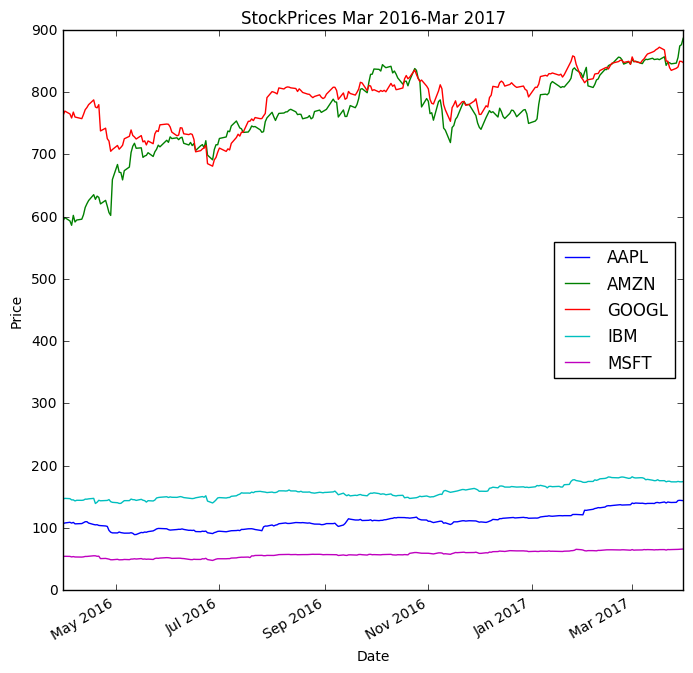

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = df1.plot(title = 'StockPrices Mar 2016-Mar 2017', fontsize = 10, figsize = (8,8))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()


In [15]:
#Normalizing
df2 = df1.copy(deep=True)
df2 = df2/ df2.ix[0,:]
   

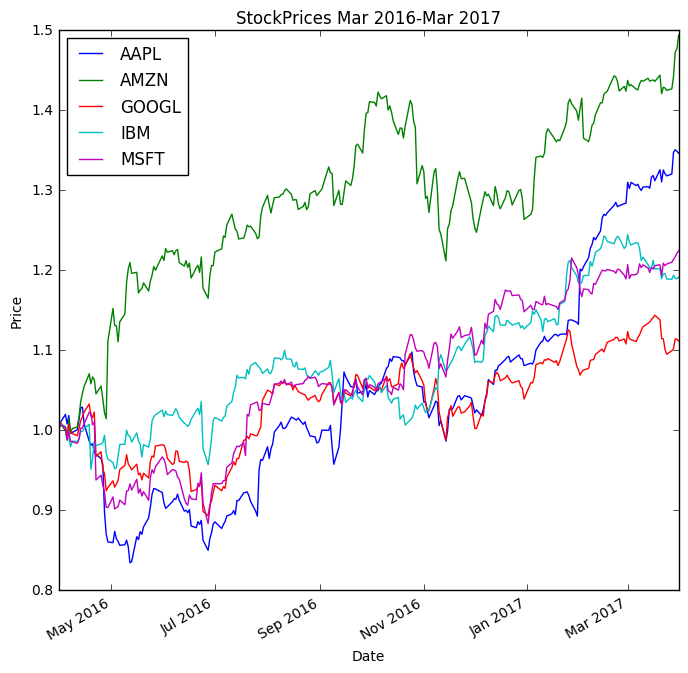

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = df2.plot(title = 'StockPrices Mar 2016-Mar 2017', fontsize = 10, figsize = (8,8))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

In [17]:
#Global Statistics
df1.mean()

AAPL     111.462195
AMZN     763.486024
GOOGL    788.659568
IBM      158.158725
MSFT      57.394811
dtype: float64

In [18]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AAPL,254.0,111.462195,14.139451,89.008370,101.614444,109.652682,116.504243,144.119995
AMZN,254.0,763.486024,66.811738,586.140015,726.662506,766.900024,817.832504,886.539978
GOOGL,254.0,788.659568,44.828639,681.140015,757.190018,799.285004,819.987503,872.369995
IBM,254.0,158.158725,11.510935,139.031776,148.982562,156.472594,165.866017,181.949997
MSFT,254.0,57.394811,5.184250,47.518973,53.088747,56.987384,62.257563,65.860001


/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()


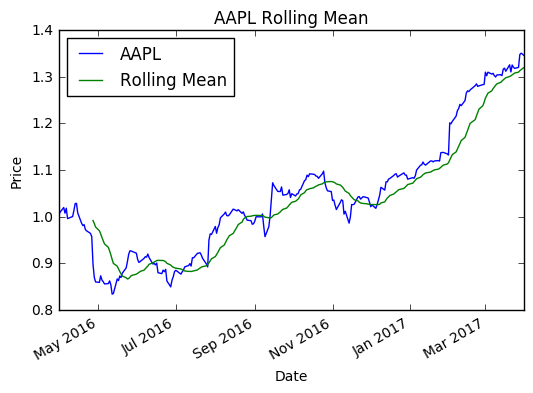

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()


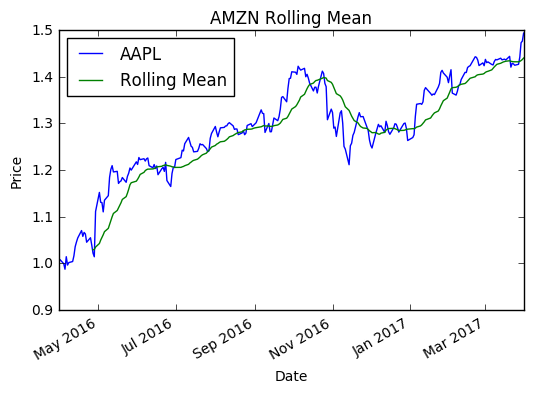

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()


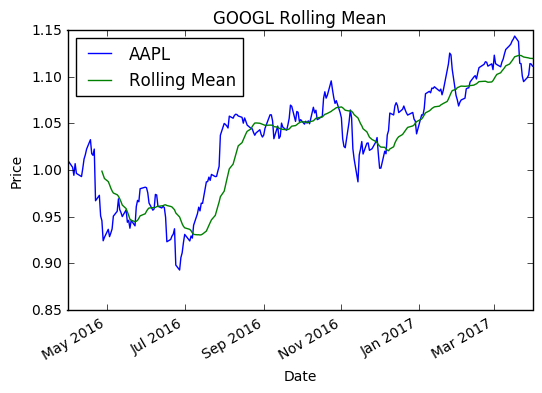

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()


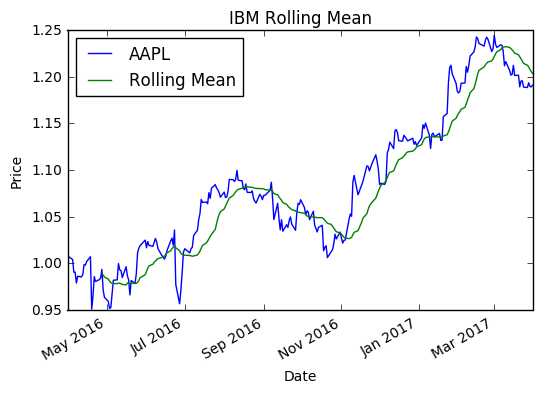

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()


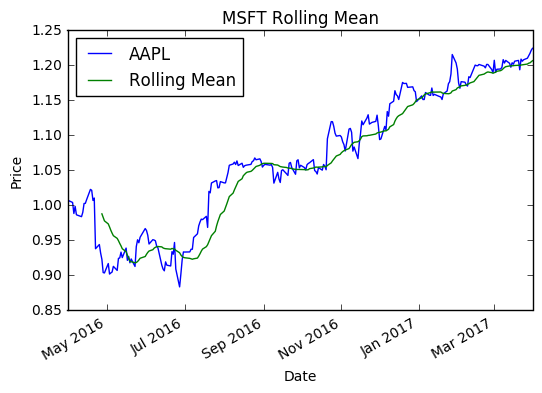

In [19]:
# Individual Rolling Statistics 

###AAPL
ax = df2['AAPL'].plot(title = 'AAPL Rolling Mean', label = 'AAPL')
rm_aapl = pd.rolling_mean(df2['AAPL'], window = 20)
rm_aapl.plot(label= 'Rolling Mean', ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')
plt.show()

###AMZN
ax = df2['AMZN'].plot(title = 'AMZN Rolling Mean', label = 'AAPL')
rm_aapl = pd.rolling_mean(df2['AMZN'], window = 20)
rm_aapl.plot(label= 'Rolling Mean', ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')
plt.show()


###GOOGL
ax = df2['GOOGL'].plot(title = 'GOOGL Rolling Mean', label = 'AAPL')
rm_aapl = pd.rolling_mean(df2['GOOGL'], window = 20)
rm_aapl.plot(label= 'Rolling Mean', ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')
plt.show()


###IBM
ax = df2['IBM'].plot(title = 'IBM Rolling Mean', label = 'AAPL')
rm_aapl = pd.rolling_mean(df2['IBM'], window = 20)
rm_aapl.plot(label= 'Rolling Mean', ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')
plt.show()


###MSFT
ax = df2['MSFT'].plot(title = 'MSFT Rolling Mean', label = 'AAPL')
rm_aapl = pd.rolling_mean(df2['MSFT'], window = 20)
rm_aapl.plot(label= 'Rolling Mean', ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')
plt.show()

In [20]:
#Bollinger Bands(Registered Trademark)

def get_rolling_mean(values, window):
    return pd.rolling_mean(values, window = window)
def get_rolling_std(values, window):
    return pd.rolling_std(values,window=window)
def get_bollinger_bands(rm,rstd):
    upper_band = rm + rstd * 2
    lower_band = rm + rstd * 2
    return upper_band, lower_band

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).std()


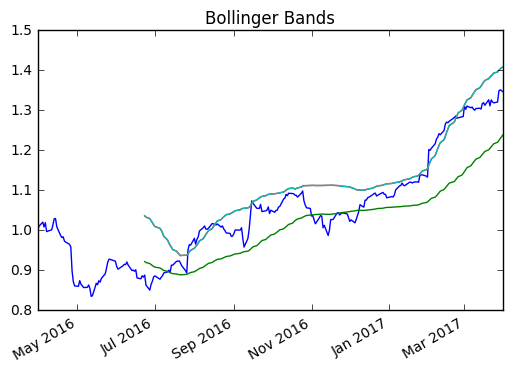

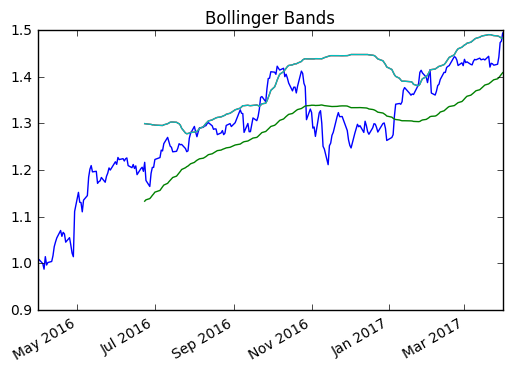

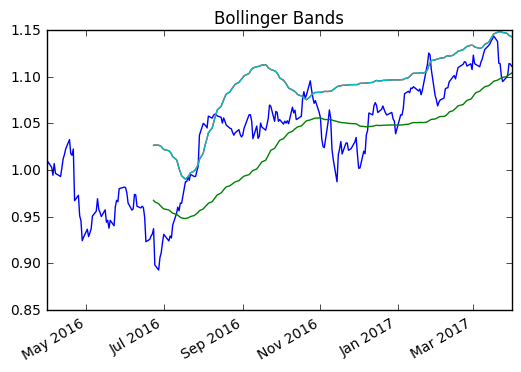

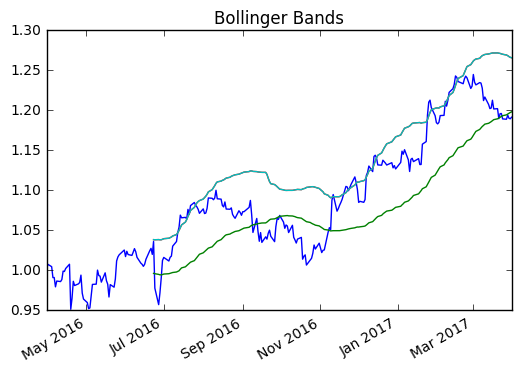

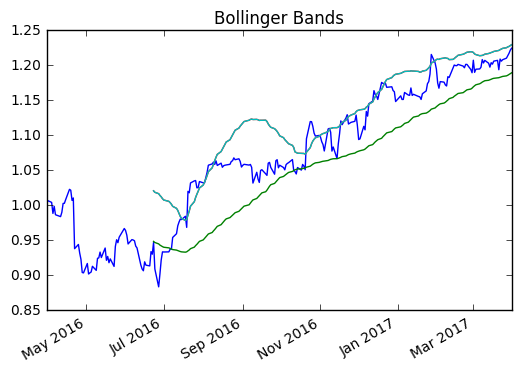

In [21]:
###AAPL

rm_aapl = get_rolling_mean(df2['AAPL'], window = 60)
rstd_aapl = get_rolling_std(df2['AAPL'], window = 60)
upper_band, lower_band = get_bollinger_bands(rm_aapl,rstd_aapl)

ax1 = df2['AAPL'].plot(title = 'Bollinger Bands', label = 'AAPL')
rm_aapl.plot(label = 'Rolling mean', ax = ax1)
upper_band.plot(label = 'upper band', ax = ax1)
lower_band.plot(label = 'lower band', ax = ax1)
plt.show()

###AMZN
rm_aapl = get_rolling_mean(df2['AMZN'], window = 60)
rstd_aapl = get_rolling_std(df2['AMZN'], window = 60)
upper_band, lower_band = get_bollinger_bands(rm_aapl,rstd_aapl)

ax2 = df2['AMZN'].plot(title = 'Bollinger Bands', label = 'AMZN')
rm_aapl.plot(label = 'Rolling mean', ax = ax2)
upper_band.plot(label = 'upper band', ax = ax2)
lower_band.plot(label = 'lower band', ax = ax2)
plt.show()

###GOOGL
rm_aapl = get_rolling_mean(df2['GOOGL'], window = 60)
rstd_aapl = get_rolling_std(df2['GOOGL'], window = 60)
upper_band, lower_band = get_bollinger_bands(rm_aapl,rstd_aapl)

ax3 = df2['GOOGL'].plot(title = 'Bollinger Bands', label = 'GOOGL')
rm_aapl.plot(label = 'Rolling mean', ax = ax3)
upper_band.plot(label = 'upper band', ax = ax3)
lower_band.plot(label = 'lower band', ax = ax3)
plt.show()


###IBM
rm_aapl = get_rolling_mean(df2['IBM'], window = 60)
rstd_aapl = get_rolling_std(df2['IBM'], window = 60)
upper_band, lower_band = get_bollinger_bands(rm_aapl,rstd_aapl)

ax4 = df2['IBM'].plot(title = 'Bollinger Bands', label = 'IBM')
rm_aapl.plot(label = 'Rolling mean', ax = ax4)
upper_band.plot(label = 'upper band', ax = ax4)
lower_band.plot(label = 'lower band', ax = ax4)
plt.show()


###MSFT
rm_aapl = get_rolling_mean(df2['MSFT'], window = 60)
rstd_aapl = get_rolling_std(df2['MSFT'], window = 60)
upper_band, lower_band = get_bollinger_bands(rm_aapl,rstd_aapl)

ax5 = df2['MSFT'].plot(title = 'Bollinger Bands', label = 'MSFT')
rm_aapl.plot(label = 'Rolling mean', ax = ax5)
upper_band.plot(label = 'upper band', ax = ax5)
lower_band.plot(label = 'lower band', ax = ax5)
plt.show()


<h3>Daily Returns:</h3><br>Daily Returns is the value of how much the price went up or down on a particular day. It is calculated by the formula: daily_returns[t] = (price[t]/price[t-1]) - 1. In other words, it is todays stock price divided by yesterday's stock price minus one.

In [22]:
def compute_daily_returns(df):
    daily_returns = df2.copy()
    daily_returns[1:] = (df2[1:] / df2[:-1].values) - 1
    daily_returns.ix[0,:] = 0 # daily returns for zeroeth row is set to zero
    return daily_returns

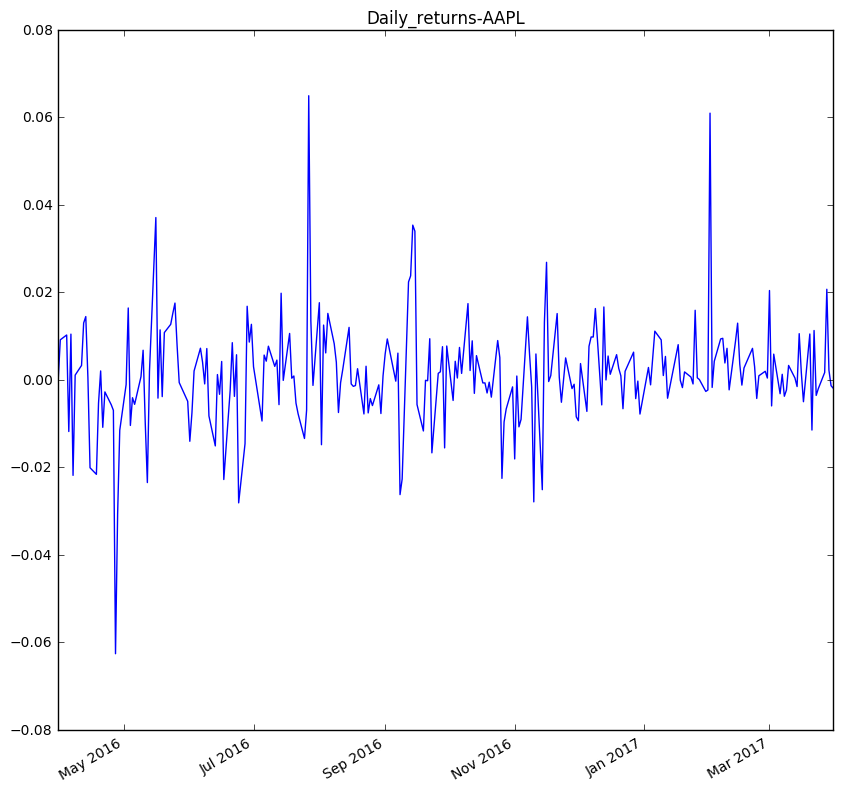

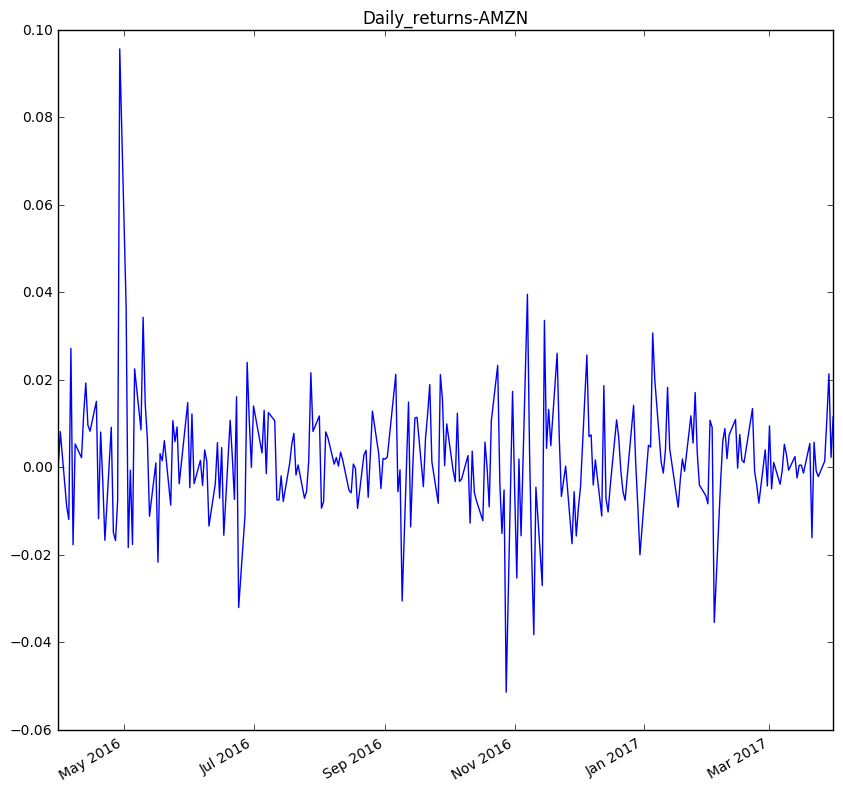

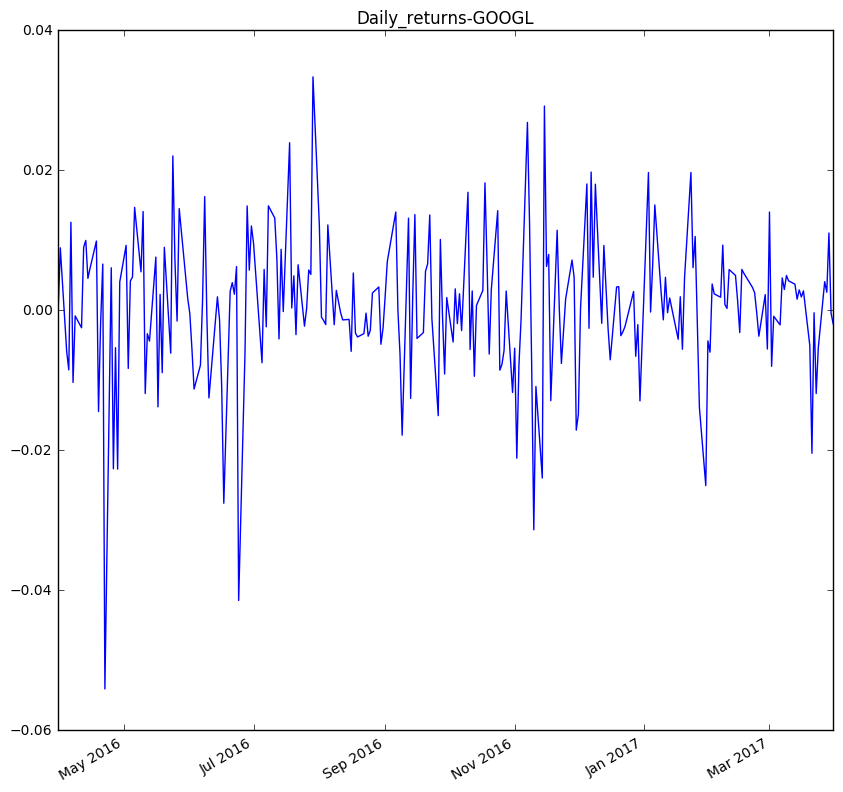

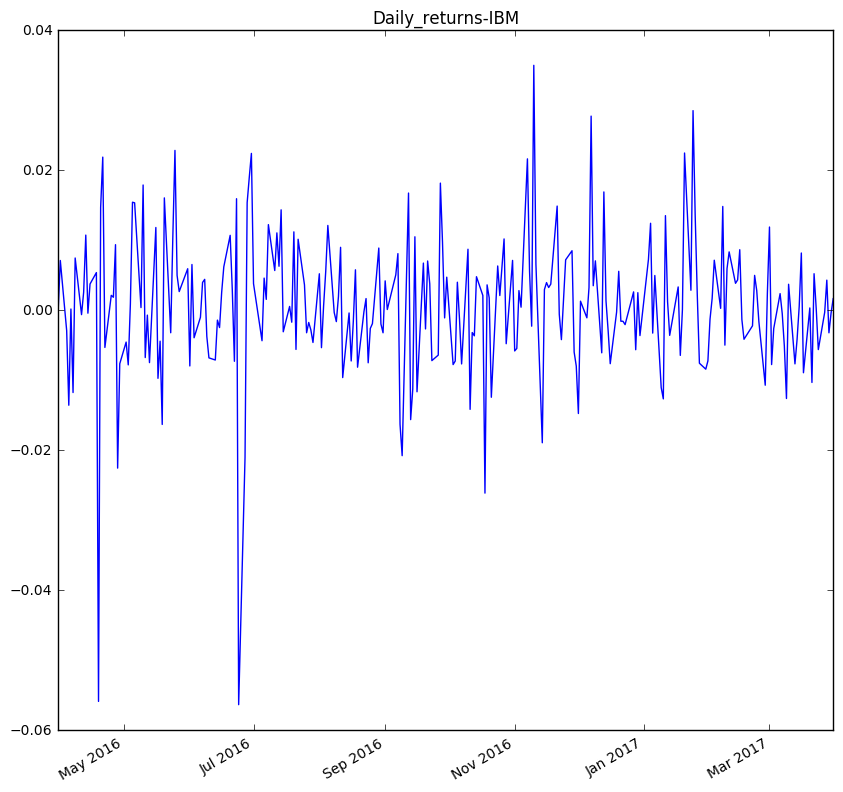

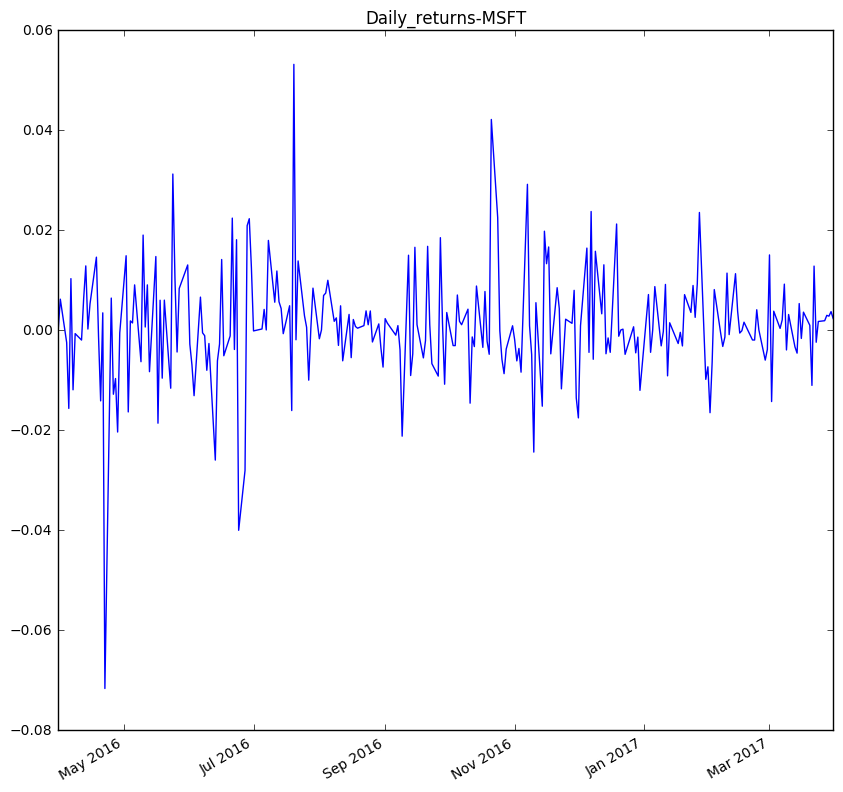

In [23]:



daily_returns = compute_daily_returns(df2)
daily_returns['AAPL'].plot(title = 'Daily_returns-AAPL', figsize = (10,10))

plt.show()
daily_returns['AMZN'].plot(title = 'Daily_returns-AMZN', figsize = (10,10))

plt.show()
daily_returns['GOOGL'].plot(title = 'Daily_returns-GOOGL', figsize = (10,10))

plt.show()
daily_returns['IBM'].plot(title = 'Daily_returns-IBM', figsize = (10,10))

plt.show()
daily_returns['MSFT'].plot(title = 'Daily_returns-MSFT', figsize = (10,10))

plt.show()
#daily_returns.hist(bins=20, figsize = (18,18))
#plt.show()

<h3> Statistics of DailyReturns</h3>

In [24]:
meanAAPL = daily_returns['AAPL'].mean()
stdAAPL = daily_returns['AAPL'].std()
meanAMZN = daily_returns['AMZN'].mean()
stdAMZN = daily_returns['AMZN'].std()
meanGOOGL = daily_returns['GOOGL'].mean()
stdGOOGL = daily_returns['GOOGL'].std()
meanIBM = daily_returns['IBM'].mean()
stdIBM = daily_returns['IBM'].std()
meanMSFT = daily_returns['MSFT'].mean()
stdMSFT = daily_returns['MSFT'].std()

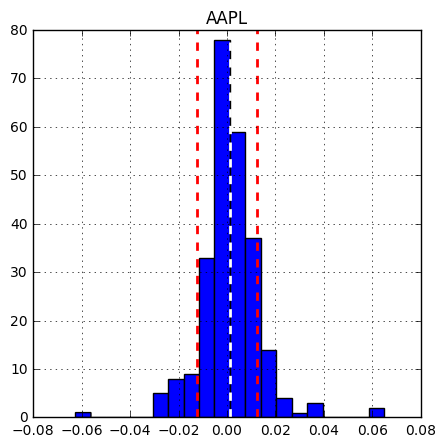

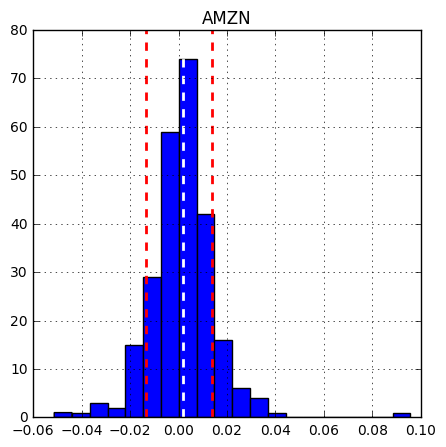

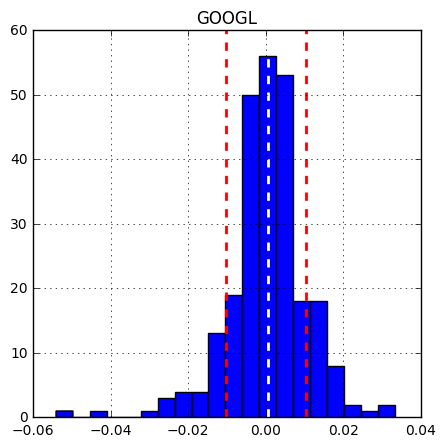

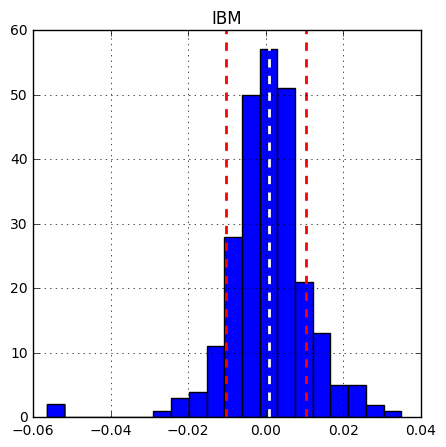

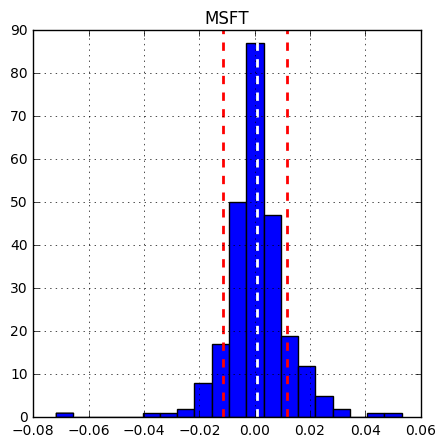

In [25]:
daily_returns['AAPL'].hist(bins=20, figsize = (5,5))
plt.axvline(meanAAPL, color = 'w',linestyle = 'dashed', linewidth =2)
plt.axvline(stdAAPL, color = 'r',linestyle = 'dashed', linewidth =2)
plt.axvline(-stdAAPL, color = 'r',linestyle = 'dashed', linewidth =2)
plt.title('AAPL')
plt.show()
daily_returns['AMZN'].hist(bins=20, figsize = (5,5))
plt.axvline(meanAMZN, color = 'w',linestyle = 'dashed', linewidth =2)
plt.axvline(stdAMZN, color = 'r',linestyle = 'dashed', linewidth =2)
plt.axvline(-stdAMZN, color = 'r',linestyle = 'dashed', linewidth =2)
plt.title('AMZN')
plt.show()
daily_returns['GOOGL'].hist(bins=20, figsize = (5,5))
plt.axvline(meanGOOGL, color = 'w',linestyle = 'dashed', linewidth =2)
plt.axvline(stdGOOGL, color = 'r',linestyle = 'dashed', linewidth =2)
plt.axvline(-stdGOOGL, color = 'r',linestyle = 'dashed', linewidth =2)
plt.title('GOOGL')
plt.show()
daily_returns['IBM'].hist(bins=20, figsize = (5,5))
plt.axvline(meanIBM, color = 'w',linestyle = 'dashed', linewidth =2)
plt.axvline(stdIBM, color = 'r',linestyle = 'dashed', linewidth =2)
plt.axvline(-stdIBM, color = 'r',linestyle = 'dashed', linewidth =2)
plt.title('IBM')
plt.show()
daily_returns['MSFT'].hist(bins=20, figsize = (5,5))
plt.axvline(meanMSFT, color = 'w',linestyle = 'dashed', linewidth =2)
plt.axvline(stdMSFT, color = 'r',linestyle = 'dashed', linewidth =2)
plt.axvline(-stdMSFT, color = 'r',linestyle = 'dashed', linewidth =2)
plt.title('MSFT')
plt.show()

<h3>Cumulative Returns:</h3> <br> Cumulative Returns is the percentage gain or loss over a period of time. The formula for this is : (Current Price - Original Price)/Original Price. 

In [26]:
def compute_cum_returns(df):
    cum_returns = df2.copy()
    cum_returns = (1 + daily_returns).cumprod() - 1
    return cum_returns

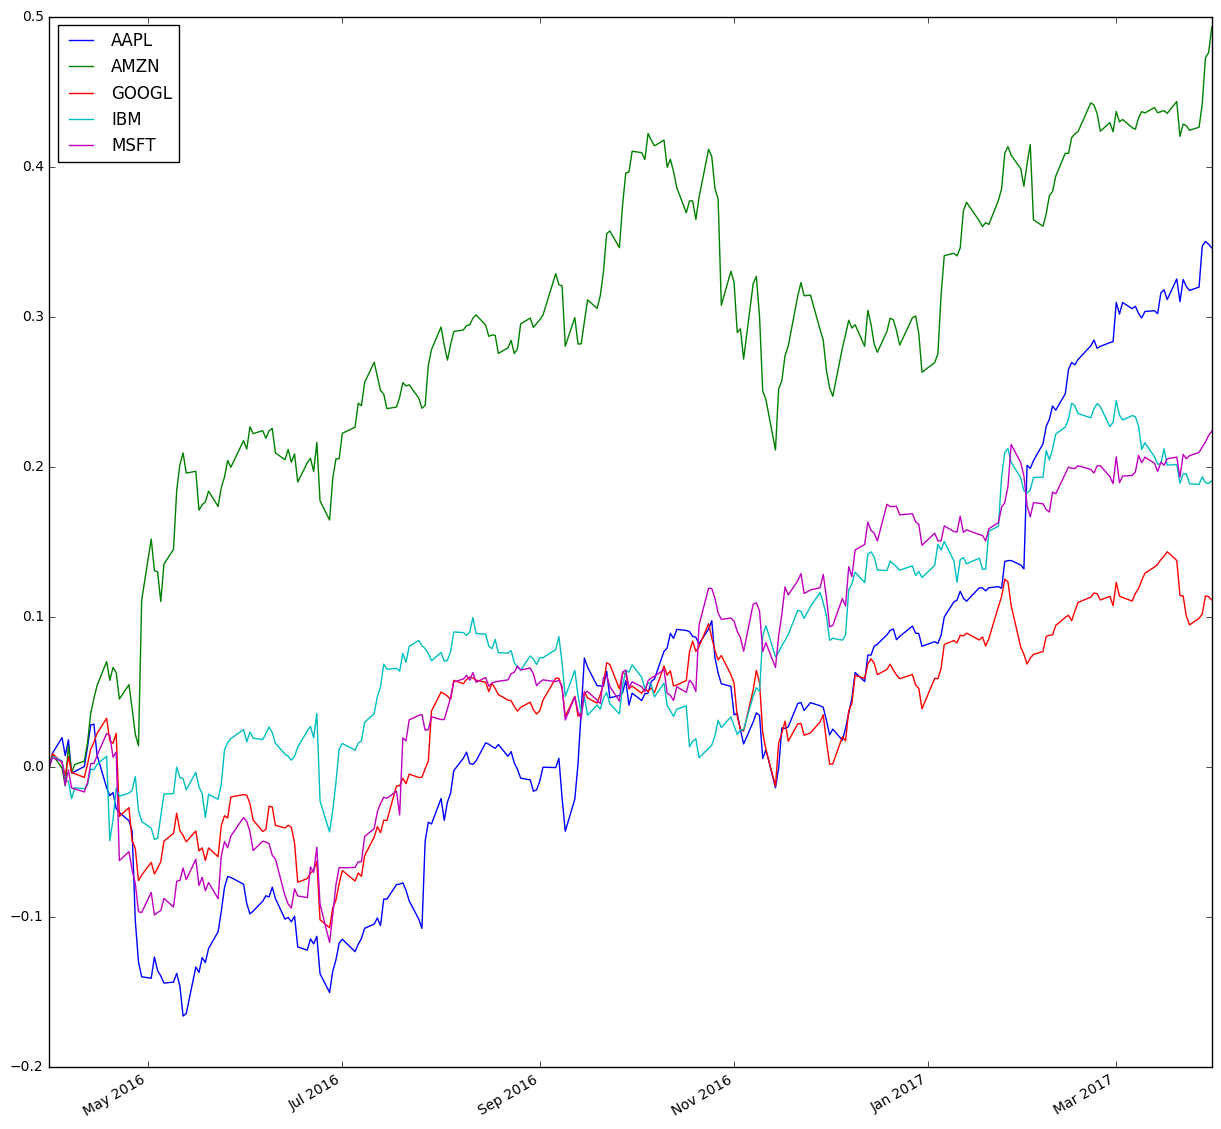

In [27]:

cum_returns = compute_cum_returns(df2)

cum_returns.plot(label = 'Cumulative_returns', figsize = (15,15))

plt.show()

In [28]:
df2.index

DatetimeIndex(['2016-03-31', '2016-04-01', '2016-04-04', '2016-04-05',
               '2016-04-06', '2016-04-07', '2016-04-08', '2016-04-11',
               '2016-04-12', '2016-04-13',
               ...
               '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23',
               '2017-03-24', '2017-03-27', '2017-03-28', '2017-03-29',
               '2017-03-30', '2017-03-31'],
              dtype='datetime64[ns]', length=254, freq=None)

In [29]:
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

X = np.array(df2.index)
X = preprocessing.scale(X)
y = np.array(df2['AAPL'])
print len(X), len(y)

254 254


/Applications/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype datetime64[ns] was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [30]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size = 0.2)

In [31]:
clf = LinearRegression()
#clf.fit(X_train, y_train)
clf.fit(np.transpose(np.matrix(X_train)), np.transpose(np.matrix(y_train)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
pred = clf.predict(np.matrix(X_test).reshape(-1,1))


In [33]:
pred[0:5]

array([[ 0.8743209 ],
       [ 0.84070031],
       [ 1.10966509],
       [ 1.07488516],
       [ 1.13401104]])

In [39]:
#Error Metrics for weight as parameter to predict efficiency
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test,pred)
print "mse:"
print(mse)
rmse = sqrt(mse)
print "rmse:"
print(rmse)
var = np.var(pred)
print "var:"
print var

mse:
0.00654309430994
rmse:
0.0808893955345
var:
0.0155734624522
